In [2]:
! pip install praw
! pip install -U textblob
! python -m textblob.download_corpora

Requirement already up-to-date: textblob in /opt/anaconda3/lib/python3.8/site-packages (0.15.3)
[nltk_data] Downloading package brown to /Users/kaylah/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kaylah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kaylah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kaylah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/kaylah/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kaylah/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [1]:
import requests
import requests
import requests.auth
import praw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from textblob import TextBlob

In [2]:
# user information and auth info

user_id = 'kaythomedu'
user_pass = None
client_id = 'Ww1gfcX500dqWg'
secret = 'YiQCz4XAinioTTO0Xczzk5lITV25tQ'
user_agent = 'User-Agent:com.example.politicsresearch:v1.0.0 (by u/kaythomedu)'

In [3]:
client_auth = requests.auth.HTTPBasicAuth(client_id, secret)

In [4]:
# initializing Reddit 
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=secret,
    user_agent=user_agent)

print(reddit.read_only) # checking to see if the reddit instance worked

True


In [5]:
# assigning the desired subreddit to subreddit object
subreddit = reddit.subreddit('politics')

In [6]:
# searching for top posts within the last year that match the search query on the assigned subreddit
counter = 0
for post in subreddit.search('black lives matter', 'top', time_filter='year'):
    print(str(post.id) + '  ' + str(post.created_utc) + '  ' + str(post.title) + '\n')
    counter += 1
    if counter == 10:
        break

gylm53  1591567233.0  Mitt Romney joins Black Lives Matter march in D.C.

hcbbvh  1592609393.0  Asked repeatedly to say 'Black lives matter,' Mike Pence says 'all lives matter'

guwpm8  1591057620.0  Megathread: President Donald Trump Mobilizes Military Amid National Unrest

hzzf4u  1596023832.0  A Nevada library wanted to back Black Lives Matter. The sheriff said he wouldn’t respond to 911 calls there.

jpfna6  1604704126.0  Black People Repudiated Trump Like He Was a Piece of Used Gum - It’s time for centrist Democrats to stop whining about Black Lives Matters protests and start recognizing that Black voters literally saved the election.

ho42tc  1594305067.0  Megathread: Supreme Court Rules on Subpoenas for President Donald Trump’s Financial Records

hnthxp  1594256239.0  NYC to start painting Black Lives Matter mural in front of Trump Tower Thursday despite pushback from Trump

i8cx5z  1597235639.0  Donald Trump Jr. and Ted Cruz shared Russian misinformation about Black Lives Matte

In [16]:
# initializing the post to collect data from
post = reddit.submission(id = 'hzzf4u')

In [ ]:
# collecting comments from outermost thread and storing info in dictionary

post.comment_sort = 'top'
first_comments = []
post.comments.replace_more()

for init_comment in post.comments:
    first_comments.append((init_comment.author, init_comment.id, init_comment.body))

first_comments

In [8]:
# gathering first replies to commenters, will only determine if there is discourse if the replier
#has negative sentiment rather than the initial commenter
# collecting replies to first_comments and storing info in dictionary

responses = {}
for author, comm_id, text in first_comments:
    comment = reddit.comment(comm_id)
    comment.reply_sort = 'old'
    comment.refresh()
    comment.replies.replace_more()
    tree = comment.replies
    if len(tree) == 0:
        continue
    replies = []
    for reply in tree:
        print(reply.author)
        blob_reply = TextBlob(reply.body)
        if blob_reply.sentiment[0] < 0: # then conclude that there is some discourse from the user to the initial reply to the post
            replies.append((comm_id, blob_reply.sentiment[0], reply.author, 
                            reply.created_utc, reply.id, reply.body))
    responses[comm_id] = replies

responses

Rick_Shasta
MazzIsNoMore
JJGerms
Dark_Aurori
SQUID_FUCKER
BebopOW
togro20
bigmac80
Rorako
AlwaysMissToTheLeft
dub-fresh
1P221
merlinsmushrooms
robfrizzy
MadKingSoupII
None
None
HamGraham
TheManWhoWasNotShort
MisterDonkey
5_Star_Golden_God
ohdidya
PatrickKanesLawyer
jeb1499
dan986
wattersonjams
bionix90
dictionary_hat_r4ck
Donigula
DreddPirateBob4Ever
TurnPunchKick
Bamith
dittbub
tphd2006
djabor
L00K-LEFT
_synth_lord_
professorhazard
mcpat21
mamatttn
acuntex
White_Knights
None
naeads
Betasaurus
rxneutrino
StopBotAgnotology
Blovnt
maine14
texasguy911
flkraven
Nick-Anand
SiccSemperTyrannis
SinProtocol
CritzD
fudabushi
IAm12AngryMen
The_Castle_of_Aaurgh
night-shark
rebellion_ap
GirthWindNFire
Ruski_FL
acog
shadovvvvalker
Hob_goblin
mikerichh
serendippitydoo
All_Kale_Seitan
Osuwrestler
None
nicholus_h2
KillerKowalski1
None
kron_00
upsidedownfunnel
cataclyzzmic
Jess_than_three
AlienConsulate
LagWagon
ShumaG
MuchoMarsupial
CarpeNivem
juliet-22
HowITrulyFeel
metengrinwi
Eric_the_Barbarian
Miro

FoUfCfK
Kukantiz
thatsnotwait
TrumpImpeachedInJuly
Teddy_Man
None
None
None
mothman83
dylansavillan
JJGerms
fingerBANGwithWANG
None
Nuciferous1
mjmandi72
-Yare-
mindbleach
None
lrg1ne
None
waelgifru
moak0
Aegi
None
SleetTheFox
Thetman38
Merakel
perdhapleybot
ulmen24
420catloveredm
vivajeffvegas
trippingchilly
SvenTropics
Lansan1ty
Reagonlol
boopkins
None
GregEvangelista
The---Batman
hackingdreams
NormalAdultMale
Eschlick
-SquirrelyDan-
Bossini
BAYMuu
AdviceDanimals
SomeKindOfOnionMummy
sigbhu
MazzIsNoMore
Pending_Profile
JohnnySnark
distantapplause
Rubberbabybuggybum
Angsty_Kylo_Ren
Totalnah
stupidstupidreddit2
Tzuchen
pandemicpunk
Pycore
vaelroth
Tenthyr
TheMentalist10
Ruski_FL
disquiet
KantanaBrigante
thoriginal
theghostecho
plynthy
Wian4
triclops6
wasp1821
Slenderocean
securitywyrm
BicyclingBabe
Pot_T_Mouth
cy13erpunk
None
FlipflopsAreNotShoes
Outrageous_Barnacle
freshSkat
ForensicPathology
Frapplo
ghsteo
portlandwealth
FeelTheWrath79
-Johnny-
daschande
Hiptozealys
SquidmanMal
Sedit

Elryc35
_AberdeenBumbledorf_
TrumpCheats
breakerbreaker992
-Fireball
very_smarter
onlyonedayatatime
chunkmasterflash
distantapplause
Neat_On_The_Rocks
chickenstalker99
None
TrumpHasASmallPnis
the2belo
Prophet92
Silver107
devedander
Weagle22
I-Upvote-Truth
Dorangos
lexiekon
PhilipJFries
Atario
goodolarchie
None
WeWander_
yoshi570
Levago
bmanone
bsdthrowaway
DaoFerret
donkeynique
None
BluBane
mud_sweat_gears
Wthermans
heliogt2
eeyore134
tagged2high
GregEvangelista
faithle55
helios21
perscitia
--_l
the_jabrd
extraspicytuna
None
Bay1Bri
Steadypirate
Endorn
Trump_is_My_Father
HKBFG
None
No_Values
None
StubbsTheWolf
N7riseSSJ
UnderTruth
NewSauerKraus
Squabstermobster
freeasabird1995
jlhouse36
None
SKmdK64
None
TrumpHasASmallPnis
electricvelvet
jayfroboss
ThoughtX
acuntex
inkyblinkypinkysue
ilovehamandbacon
Every3Years
Dantalion_Delacroix
deliciousmonster
TrumpHasASmallPnis
FerriteNightwish
ChurchofRuin
lttlmous
zwondingo
Sharker32
billybishop4242
None
Austins-Reddit
janjanis1374264932
CCP_St

spaceman_spiffy
mschweini
None
Lecken
Heboomedme_x_4
nx85
None
pmmeyourneardeathexp
JadedMuse
vyclas
GDJT
Jak03e
Kommmbucha
Nearbyatom
freeasabird1995
None
PerCat
centraleft
boobers3
natooolee89
jarlbartar
eyehate
None
Fnordpocalypse
PottedNai
Raspberries-Are-Evil
McCringleberrysGhost
None
ThatIdiotTibor
toolschism
eotor
panzerdarling
corndogshuffle
hraycroft95
apollonese
None
AFriend07
Narrator_neville
Zackwetzel
wbgraphic
2057Champs__
unsureofwhatiwant
interpretivepants
BraveDonny
sjpizza
sunny_in_phila
Somber_Solace
bigbuzd1
cuddlychops06
tfreakburg
socom2547
mrchaotica
natooolee89
jarlbartar
BeardedBassist21
orwiad10
The_Joellercoaster
Melillamac
PepeSylvia11
2057Champs__
RawBean7
David_of_Miami
RecklesslyPessmystic
Arjunnna
DeusExMarina
Lolwutgeneration
abraxas1
richochet12
headgirl
None
None
Anothergloomysunday
froopyloot
Raspberries-Are-Evil
heywhereisperry
eremite00
ThousandWinds
073090
Emmanuel_Badboy
BubblyBodybuilder
HaileSelassieII
ultraviolentfuture
Bigbadbobbyc
AzaliusZer

Sir-H-Magoo
klyrish
MrSeaBeast
pRp666
tbos92
ArtoriasBIG
very_smarter
Darth_Miguel
heyhaveyoumettay
le672
JaceStraith
MyDyingOpeth92
palikona
BigDickMrOscarPitt
EarthWarping
porkadachop
midnightingenue
RickAndBRRRMorty
light_odin5
None
AcademicPublius
None
acuntex
DMCinDet
marisaoli
supafeen
Keaper
wanttoplayball
DyingFire
37MySunshine37
None
None
sprucecone
Silversky780
Lolwutgeneration
PyroKinetic66
Arjunnna
None
RadBadTad
IK00
-SquirrelyDan-
None
writingpen
None
billthomson
tyranid1337
corndogshuffle
None
None
megamctaco
None
Season8ReallySucked
AncientPenile
MangoCats
tgwesh
None
Ijustwantmilkthat
BooooHissss
None
choochoochosen
PineapplePizzaPalace
kingtord
Barrrrrrnd
PrincipledInelegance
IFeelLikeYandhi
ChefBoiledKnees
therevlonspamqueen1
Slimshaydena
luminousfleshgiant
lowrads
mrchaotica
malpasplace
Sir-Knightly-Duty
_nod
SinthoseXanataz
nosleepy
yogstundrowil
Shivshanks
None
None
Captain-Vimes
curiousnaomi
None
None
Terrible_Tutor
runujhkj
blahism
rtomek
Durgenheim
ascii122
The

heywobbles
pmmeyourneardeathexp
banjomatic
Leeher
BigDickMrOscarPitt
Darth_JarX2
SoRaffy
None
kgd6578
corndogshuffle
Pining4theFnords
acuntex
Rockefor
Donkey-Whistle
maxbemisisgod
DavePeak
fireballs619
Isitjustme456
Isitjustme456
IndianKiwi
David_of_Miami
AWDpirate
Dead_ace
None
reftheloop
KNBeaArthur
starfish_warrior
StuGats
None
cowboycoco
Kandoh
BWOT32
JuanaSmoke
MrSteele_yourheart
rossmosh85
pdxmhrn
PLEASE_PUNCH_MY_FACE
for_jalu
faisent
morningreis
None
Emmanuel_Badboy
throckmeisterz
mooseman2234
None
Dravdrahken
Initial-Tangerine
thelovebandit
None
thehappyheathen
TrumpHasASmallPnis
Chef818
3oons
tramil0502
Cody930
me_bell
RosaRisedUp
DONTLOOKITMEIMNAKED
hurler_jones
light_odin5
bankspro13
robbertomato
snowman327
KatalDT
Scanlansam
Sirsilentbob423
filmfan10
hexiron
LGHAndPlay
KantanaBrigante
davidletanosky
Medicfireman
11bztaylor
x4vr0sz
InferiousX
DorisCrockford
le672
TesticleMayhem
None
wtfreddithatesme
turk4lyfe
None
Ohfuckofftrumpnuts
None
jimmygzombie
wobermey1987
randomlight

BrofessorFarnsworth
None
PrincessToadTool
IamnotHorace
koshgeo
KeyExplanation
of_red_blood
ouncedicetrice
Stillhart
goodgattlinggun
A_Random_Canuck
None
TheChij
acuntex
gamermanh
whythishaptome
None
Smogh
ZOMGURFAT
godcostume
Hoten
Abshole
Yamane55
devm251979
Heliosvector
None
igoggledyournam3
FormerOrpheus
apaksl
Jon1166
ThePecanRolls5225
misha_the_homeless
Enjolras55
J011Y1ND1AN
electi0neering
a_candle_in_the_dark
marcololol
Close_But_No_Guitar
None
hotstandbycoffee
FetchMeMyLongsword
PLEASE_PUNCH_MY_FACE
seleaner015
atuarre
None
Foul_Mouthed_Mama
MurkyMegagoat
Konukaame
None
I_Conquer
KantanaBrigante
BostonGreekGirl
Barneysparky
jtweezy
j_la
HamburgerEarmuff
Wthermans
HamburgerEarmuff
horse_loose_hospital
bfredo
None
sedatedlife
falgscforever2117
mgrateful
KeenanAXQuinn
Vigilante17
avocadopalace
mjbel23
None
3TH4N_12
lurklurklurkanon
NarwhalDevil
Smogh
Xcalibur02
vguy72
lurklurklurkanon
kagethemage
Smogh
None
letsrollwithit
jdave512
benfscheme
BlazinAzn38
The0rogen
le672
-deebrie-
c

scatteredround
Altyrmadiken
mrgeebs17
Awesome75
schwol
Paulverizr
Otisbolognis
IAmSpinda
lazyspitfire
BARchitecture
unsureofwhatiwant
pmmeyourneardeathexp
Daeveed
i_am_i_am_i_am_i_am
Knosh
bitchhhhhhhh
ItsJustRedditRelax
rogueR0B0T
g1rthqu4k3
Redditsbernieboner
FoxVeridian
Nightsong
hellopls
dragonfliesloveme
TrumpIsABigFatLiar
shindiggaa
None
Seanandonandon
Diarygirl
None
UncleMalky
Smogh
berapa
TheA55M4N
Erock11
UncleMalky
Nightsong
westviadixie
elspazzz
Tentapuss
None
Carr2024
Pylgrim
gmpklled
gnarlnick
kaleb209
AnotherBlueRoseCase
ilikefreedomfries
InfiniteSmugness
SereneGraces
None
LillthOfBabylon
wil_daven_
revmaynard1970
WalesIsForTheWhales
entropy_generator
PG_Heckler
Imnotyoursupervisor
SeaABrooks
Emmanuel_Badboy
RecklesslyPessmystic
SovietBozo
Terrible_Tutor
Crypticmermaid
JustABiViking420
Wthermans
buttlovingpanda
-SquirrelyDan-
newtoeugeneviachi
heywobbles
h8ss
incorrecttw0
Enjolras55
3TH4N_12
the_incredible_hawk
schwol
skinniks
sirnamel3ss
Thugosaurus_Rex
lmirise
None
2057

{'fsl2cu0': [('fsl2cu0',
   -0.03409090909090908,
   Redditor(name='JJGerms'),
   1591059904.0,
   'fsl4zha',
   'Religious people need to speak up NOW. \n\nYou think Jesus would put up with this shit? Fuck no -- he was JESUS.\n\nDude hung out with poor people and said "I love you." \n\nThere\'s most of a whole goddamn testament in the Bible devoted to this, and it\'s the *newest* one. Jesus hasn\'t said dick since. \n\nHe also didn\'t threaten to bomb his oppressors. And don\'t give me that "Well, actually, the technology back then--" No, shut it. He was Jesus. If he wanted to build a bomb so big he couldn\'t even lift it, well... actually theologists still wrestle with that one.\n\nLook, I was raised Catholic. I know the hypocrisy, the loopholes, the double standards braided throughout that weird scene. Hell, most of them vote for Trump because he\'s "pro-life". In what world?\n\nSeriously, religious people -- you\'ve got a voice. You really want Trump riding on Jesus\' coattails? Gi

In [9]:
# Using user info from replies to gather their post data, 24 hours before and 24 hours after 
user_posts_before = {}
user_posts_after = {}
for reply in responses.values():
    if not reply:
        continue
    for orig_comm, sentiment, author, time_created, comm_id, text in reply:
        if author == None:
            continue
        user = reddit.redditor(author)
        try:
            print(user.id)
        except AttributeError:
            continue
        comments_24hr_before = []
        comments_24hr_after = []
        for comment in user.comments.new(limit=None):
            if comment.created_utc < time_created and comment.created_utc > (time_created - 86400):
                blob_comment = TextBlob(comment.body)
                comments_24hr_before.append((blob_comment.sentiment[0], 
                                             author, comment.created_utc, comment.body))
            if comment.created_utc >= time_created and comment.created_utc < (time_created + 86400):
                blob_comment = TextBlob(comment.body)
                comments_24hr_after.append((blob_comment.sentiment[0], 
                                            author, comment.created_utc, comment.body))
        user_posts_before[author] = comments_24hr_before
        user_posts_after[author] = comments_24hr_after

user_posts_before
user_posts_after

7kz1y
95u81
5yltaeoy
yaymu
3q064
57hh8ays
d75wi
jglrs
aye77
c195xgy
tso82b5
1rqwv3gj
16fx1h
4563j
bccsv
2thg43wi
hug5x
fpm9wsz
zggfn
ibf4x
72abz
419ki06v
d4ad2
5bkgbp0m
4nurw6hl
13y2sc
6sc3m
13in6v
uhapi0r
10c4dz67
58iku
1qnfx4bk
j7i90
4nz9xs67
69iw7
430cglf7
18ccbgjy
47h89
9kmca
13j1y0
dneha
7v511
20pfigyf
26ntds6f
p3x5f
1o71zo
3o83g
3t62j
8sbv2
hkjeq
5oygg
jt1bb
55368
2k1nwek1
51cyi81v
5i2tn
raqir
jsfnn
8fc5r
3ek8a
7hu4w
dtyvo
4gfms
eq69g
46rvu
1o71zo
64bg7xwq
7rsvt
7o94o
87dk7
idid8
3f0v1xl5
6jtg13pp
ah48o
4cisq
2401x53e
ql1v0n6
et248
cw14f
2qrwyxoz
69iw7
aqbjq
3rdp01c5
cvx0r
k7loo
912hc
6i0rw
nopng
3f3vnae5
3xf071zl
wptk3
hkirp
4kf0ty5c
4ki8au73
so9115d
67djzlt9
72k8b
4bbq4
b90zj
4l8c7
fiscj
4w4ejnfm
10s42p
3ybqh5qq
curwy
14401y
3s464m13
2ew25qqb
3c4cj
9r7u6
79eyv
9tylx
1f0kz
6dcwfxlb
8zfkv
btnh2
bne5p
f2bfa
tbvik
14n613
jjq9x
5f4leke0
1d7zhyjo
57qvo
4a6ah3hh
d5i3f
cguqt
68lki23f
7ew5u
6cfiu
2xakw2w3
14apdx5v
zkbkr
57dvm
48vpy9po
46x1p
42f10
n6mml
6bd7s2ix
4qoim13h
3gzxl
kh3z6
972f

888dn
550pa
6cik4yjv
govxp
7xrju
iavgg
d008k
n9x4i
rpovo
c9wyj
c9wyj
nysg8r
5le61
agugp
6ovo1
nzhiy
5jmjzz1l
ai9yt
634auwr6
5ubt94ri
13x3n5
540k8ghd
5yq0c
41tnebr7
3iomuvfc
nysg8r
7tqo0
2v7oztyo
symz4
4h5anveq
4h5anveq
11g9az
kibai
4xc11vxv
3p4lco2k
3s0vy
5ibf2
136hosxy
7i0n5
1otvetbi
1fl8tp32
515t1
c6uqp
fr9zb
xnlmx
1i973zxx
uk18o
j9gze41
r8g9d
a40rp
1axe5533
55c41nj0
h4qc8
iavgg
2q2wpy92
2sbv0mtf
5rvc1
3yf7vx49
10jxgi
1gwzbq0u
678up9by
14mi11
zc545
6uu18
c9wyj
wsouy
inq0n
c0b9t
74gvx
1rl1gc3b
fcjde
6n9xocsa
1otvetbi
12vybk
z5enbsq
47yb785d
3semj0se
l0kjk
1i973zxx
1n37vjk5
c9wyj
6ub7j
92qcytp
fgstw
b37lq
biqey
4433c
v3ryj9b
1jzw18yb
69iw7
3tapg
63vyw3dg
douml8
56lqz
5lfi2
1pvqkkzb
69iw7
5v93w
69iw7
1kwbw24a
b4wd9
6jj8lycs
1t7ri6ty
136hosxy
1i973zxx
dwp9im
4qctu2bn
25cnkefd
3vmoy
drqsn
d2n90
ueju2
6fx2k0eo
jn4u0
6muta8dp
3vmoy
3vmoy
n3i04
4xboq
425z3q2m
pj8rp
4guuipco
n9x4i
69iw7
ueju2
11a9o6
ixjzh
eb3ki
awwsptd
1n37vjk5
mowhq
eb3ki
5wgnwjm5
43r0if46
6br0ino6
rrj6orw
69iw7
6y1v9
eb3ki


{Redditor(name='togro20'): [],
 Redditor(name='Rorako'): [],
 Redditor(name='merlinsmushrooms'): [(-0.125,
   Redditor(name='merlinsmushrooms'),
   1591127806.0,
   "The story of how it got there is weird, too.\nEdit:  a guy showed up using a fake name with about 80 grand in cash and paid local contractors to cut, move, and build the structure\nThen he disappeared and no one's seen him since."),
  (-0.5,
   Redditor(name='merlinsmushrooms'),
   1591127209.0,
   "That's my cousin in a nutshell(NOPD). He even found a doc to write up fake disability notes about a busted hand so they let him stay in the office. We don't talk anymore, cause he's a narcissistic prick."),
  (0.0, Redditor(name='merlinsmushrooms'), 1591119934.0, "And I'm with you."),
  (0.25,
   Redditor(name='merlinsmushrooms'),
   1591107136.0,
   "I am- you're probably not wrong."),
  (-0.0062500000000000056,
   Redditor(name='merlinsmushrooms'),
   1591106694.0,
   "I mean- for what it's worth- we're probably gonna need th

In [10]:
# creating pandas database of reply from original 
#submission, posts+sentiment scores before, and posts+sentiment score after

authors = []
orig_sentiment = []
for replies in responses.values():
    for comm_id, sentiment, author, created_utc, rep_id, text in replies:
        authors.append(author)
        orig_sentiment.append(sentiment)
        
usernames_before = []
mean_sentiment_before = []
for author in user_posts_before.keys():
    usernames_before.append(author)
    sentiment_before = []
    for sentiment, author, created_utc, text in user_posts_before[author]:
        sentiment_before.append(sentiment)
#     if not sentiment_before:
#         mean_sentiment_before.append(0)
#     else:
    mean_sentiment_before.append(np.mean(sentiment_before))

usernames_after = []
sentiments_after = []
mean_sentiment_after = []
for author in user_posts_after.keys():
    usernames_after.append(author)
    sentiment_after = []
    for sentiment, author, created_utc, text in user_posts_after[author]:
        sentiment_after.append(sentiment)
    sentiments_after.append(sentiment_after)
#     if not sentiment_after:
#         mean_sentiment_after.append(0)
#     else:
    mean_sentiment_after.append(np.mean(sentiment_after))
        
    

orig_post_info = {'author' : authors, 'orig_sentiment' : orig_sentiment}
before_user_dict = {'author' : usernames_before, 'mean sentiment before' : mean_sentiment_before}
before_user_info = pd.DataFrame(before_user_dict)
after_user_dict = {'author' : usernames_after, 'mean sentiment after' : mean_sentiment_after, 
                   'sentiments after' : sentiments_after}
after_user_info = pd.DataFrame(after_user_dict)

sentiment_df = pd.DataFrame(orig_post_info)

sentiment_df = sentiment_df.merge(before_user_info, on = 'author')
sentiment_df = sentiment_df.merge(after_user_info, on = 'author')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
sentiment_df = sentiment_df.dropna()

In [ ]:
sentiment_df.to_csv('fourth_post.csv')

In [11]:
sentiment_df = pd.read_csv('third_post.csv', index_col = [0])
sentiment_df

,author,orig_sentiment,mean sentiment before,mean sentiment after,sentiments after
2,merlinsmushrooms,-0.053125,0.100000,-0.025937,"[-0.125, -0.5, 0.0, 0.25, -0.00625000000000000..."
4,dan986,-0.053125,0.175779,-0.001563,"[0.05, -0.053125000000000006]"
7,dictionary_hat_r4ck,-0.003125,0.094648,0.180805,"[0.5, 0.0028409090909090884, 0.0, 0.2375, 0.10..."
8,djabor,-0.079911,0.045893,-0.055164,"[0.22453703703703706, -0.3101190476190476, -0...."
13,maine14,-0.256250,0.006496,-0.089201,"[-0.2, 0.125, 0.08333333333333333, -0.28125, 0..."
...,...,...,...,...,...
1288,Jilks131,-0.450000,-0.100000,-0.006250,"[0.0, -0.6, 0.0, 0.25, 0.25, 0.5, 0.0, -0.4500..."
1290,ItsJustRedditRelax,-0.143056,0.172135,-0.017113,"[0.13636363636363635, -0.0875, -0.366666666666..."
1291,backwoodso,-0.202778,0.020055,0.008689,"[0.125, 0.10333333333333333, 0.0, 0.2, -0.2422..."
1292,crownamedcheryl,-0.700000,0.129150,-0.250556,"[0.0, -0.09, 0.25, -0.8, 0.13333333333333336, ..."


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(sentiment_df['mean sentiment before'], 
                                                    sentiment_df['mean sentiment after'], test_size=0.2)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.02142654]
Intercept: -0.040182133938462886
Mean squared error (MSE): 0.02
Coefficient of determination (R^2): 0.00
Coefficients: [-0.02142654]
Intercept: -0.040182133938462886
Mean squared error (MSE): 0.03
Coefficient of determination (R^2): 0.00


In [13]:

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     mean sentiment after   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.1775
Date:                  Wed, 19 May 2021   Prob (F-statistic):              0.674
Time:                          18:21:27   Log-Likelihood:                 167.45
No. Observations:                   391   AIC:                            -330.9
Df Residuals:                       389   BIC:                            -323.0
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0402      0.008     -4.806      0.000      -0.057      -0.024
x1            -0.0214      0.051     -0.421      0.674      -0.121       0.079
==============================================================================
Omnibus:                      113.112   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.256
Skew:                          -1.302   Prob(JB):                     7.99e-80
Kurtosis:                       6.947   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

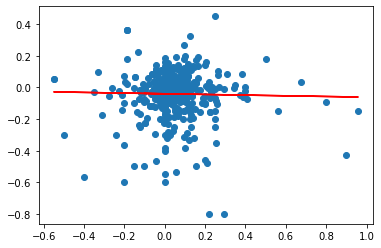

In [15]:

# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -0.0402 + -0.0214*X_train, 'r')
plt.show()